In [1]:
# set Keras backend to Tensorflow
import os
import tensorflow as tf

os.environ["KERAS_BACKEND"] = "tensorflow"
kerasBKED = os.environ["KERAS_BACKEND"] 
print(kerasBKED)

tensorflow
tensorflow


In [2]:
# import
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, InputLayer
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import os
import pickle
import numpy as np

In [3]:
# make saving directory
saveDir = "./cifar10/combTest30/"
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)

In [4]:
# get Cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x train shape:', x_train.shape)
print(x_train.shape[0], 'training images')
print(x_test.shape[0], 'test images')

x train shape: (50000, 32, 32, 3)
50000 training images
10000 test images
x train shape: (50000, 32, 32, 3)
50000 training images
10000 test images


In [5]:
from keras.utils import np_utils
# prerequisite
num_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
initNum = 10000
x_train1 = x_train[:initNum]
y_train1 = y_train[:initNum]
remainXTrain = x_train[initNum:]
remainYTrain = y_train[initNum:]

In [7]:
print("initial training X: {0}\n\
initial training Y: {1}\n\
remaining training X: {2}\n\
remaining training Y: {3}\n\
test X: {4}\n\
test Y: {5}".format(
    x_train1.shape,y_train1.shape,remainXTrain.shape,remainYTrain.shape,x_test.shape,y_test.shape))

initial training X: (10000, 32, 32, 3)
initial training Y: (10000, 10)
remaining training X: (40000, 32, 32, 3)
remaining training Y: (40000, 10)
test X: (10000, 32, 32, 3)
test Y: (10000, 10)
initial training X: (10000, 32, 32, 3)
initial training Y: (10000, 10)
remaining training X: (40000, 32, 32, 3)
remaining training Y: (40000, 10)
test X: (10000, 32, 32, 3)
test Y: (10000, 10)


In [8]:
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
from tensorflow.keras.optimizers import Adam
# optimization and compile
def compileModel(model, lr=0.001, decay=1e-6):
    opt = tf.keras.optimizers.Adam(learning_rate=lr, decay=decay)

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [10]:
# define layers
def getModel(loadModel=False, modelFilePath="", lr=0.001, decay=1e-6):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    model = compileModel(model)
    
    # load model weights if specified
    if loadModel == True:
        model.load_weights(modelFilePath)
    
    return model

In [11]:
# get the newest model file
def getNewestModel(dirname=saveDir):
    import os
    from glob import glob
    target = os.path.join(dirname, '*')
    files = [(f, os.path.getmtime(f)) for f in glob(target)]
    if len(files) == 0:
        return getModel()
    else:
        newestModel = sorted(files, key=lambda files: files[1])[-1]
        return getModel(True, newestModel[0])

In [12]:
# get the CNN model
model = getModel()

In [13]:
# train the model
def trainModel(model, xTrain, yTrain, xTest, yTest, batch_size=50, epochs=100, patience=1):
    es_cb = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, mode='auto')
    chkpt = os.path.join(saveDir, 'Cifar10_.{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5')
    cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

    # train
    model.fit(xTrain, yTrain,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(xTest, yTest),
              callbacks=[es_cb, cp_cb],
              shuffle=True)
    return model

In [14]:
# run training on the initial dataset

model = trainModel(model, x_train1, y_train1, x_test, y_test, patience=2)


Epoch 1: val_loss improved from inf to 1.58599, saving model to ./cifar10/combTest30\Cifar10_.01-1.89-1.59.hdf5

Epoch 1: val_loss improved from inf to 1.58599, saving model to ./cifar10/combTest30\Cifar10_.01-1.89-1.59.hdf5

Epoch 2: val_loss improved from 1.58599 to 1.36217, saving model to ./cifar10/combTest30\Cifar10_.02-1.51-1.36.hdf5

Epoch 2: val_loss improved from 1.58599 to 1.36217, saving model to ./cifar10/combTest30\Cifar10_.02-1.51-1.36.hdf5

Epoch 3: val_loss improved from 1.36217 to 1.25557, saving model to ./cifar10/combTest30\Cifar10_.03-1.33-1.26.hdf5

Epoch 3: val_loss improved from 1.36217 to 1.25557, saving model to ./cifar10/combTest30\Cifar10_.03-1.33-1.26.hdf5

Epoch 4: val_loss improved from 1.25557 to 1.21813, saving model to ./cifar10/combTest30\Cifar10_.04-1.23-1.22.hdf5

Epoch 4: val_loss improved from 1.25557 to 1.21813, saving model to ./cifar10/combTest30\Cifar10_.04-1.23-1.22.hdf5

Epoch 5: val_loss improved from 1.21813 to 1.15745, saving model to ./c

In [15]:
# use the pre-trained model, with 65% accuracy on test data

model.load_weights("./cifar10/combTest30/Cifar10_.09-0.69-1.04.hdf5")

In [16]:
# define evaluation method
def evaluate(model, xTest, yTest, display=False):
    # only shows loss and accuracy
    if display == False:
        ev = model.evaluate(xTest, yTest, verbose=0)
        return ev
    # shows confusion matrix, classification report and accuracy score
    else:
        import pandas as pd
        import seaborn as sn
        import matplotlib.pyplot as plt
        from sklearn.metrics import confusion_matrix
        from sklearn.metrics import classification_report, accuracy_score

        def toNum(y):
            yNum = []
            for x in y:
                yNum.append(x.argmax())
            return np.array(yNum)

        # visualize confusion matrix on heat map
        def print_cmx(y_true, y_pred):
            labels = sorted(list(set(y_true)))
            cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

            df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

            plt.figure(figsize = (10,7))
            sn.heatmap(df_cmx, annot=True)
            plt.show()

        # reshape testing target to fit to scikit-learn metric form
        y_testPred = model.predict(xTest)
        y_testP = toNum(y_testPred)
        y_true = toNum(yTest)

        # get confusion matrix, classification report and accuracy score
        print_cmx(y_true, y_testP)
        print(classification_report(y_true, y_testP))
        print("Accuracy: {0}".format(accuracy_score(y_true, y_testP)))

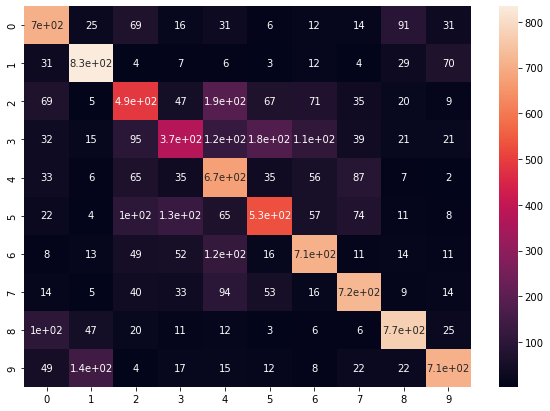

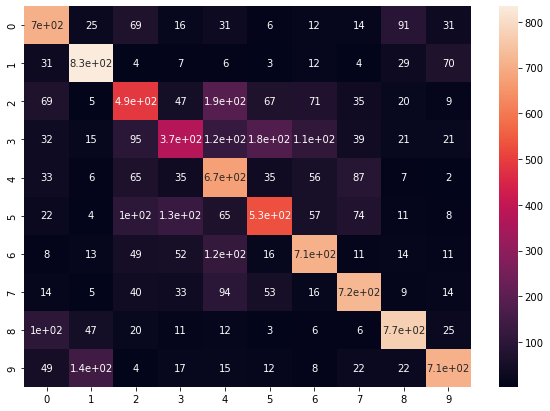

              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1000
           1       0.76      0.83      0.80      1000
           2       0.52      0.49      0.51      1000
           3       0.52      0.37      0.43      1000
           4       0.51      0.67      0.58      1000
           5       0.59      0.53      0.56      1000
           6       0.67      0.71      0.69      1000
           7       0.71      0.72      0.72      1000
           8       0.77      0.77      0.77      1000
           9       0.79      0.71      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

Accuracy: 0.6511
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1000
           1       0.76      0.83      0.80      1000
           2       0.52      0.49      0.51      1000
       

In [17]:
# evaluate the initial test dataset
evaluate(model, x_test, y_test, display=True)

In [18]:
# record the loss and accuracy
evalHistory = []
evalHistory.append(evaluate(model, x_test, y_test, display=False))
print(evalHistory[-1])

[1.0379968881607056, 0.6510999798774719]
[1.0379968881607056, 0.6510999798774719]


In [19]:
# get a list of low margin inference
def getLowMargin(proba, bound=0.01):
    ls = []
    for i in range(len(proba)):
        margin = proba[i][np.argsort(proba[i])][-1] - proba[i][np.argsort(proba[i])][-2]
        if margin < bound:
            ls.append([i,margin])
    return ls

In [20]:
# get a list of high probability inference
def getHighProb(proba, bound):
    ls = []
    for i in range(len(proba)):
        for p in range(len(proba[i])):
            if proba[i,p] > bound:
                ls.append([i,p])
    return ls

In [21]:
from keras.utils import np_utils
# concatenate initial training data with low margin of 1st and 2nd choice inference and high probability
# removing them from remaining data
def concatData(proba, remainX, remainY, xTrain, yTrain, Lbound=0.01, Hbound=0.99):
    lm = getLowMargin(proba, Lbound)
    print("number of data with first and second choice probability lower than {0}: {1}".format(Lbound,len(lm)))
    hp = getHighProb(proba, Hbound)
    print("number of data with probability higher than {0}: {1}".format(Hbound,len(hp)))
    
    nlm = np.array(np.array(lm)[:,0], dtype="int32")
    lxAdd = remainX[nlm]
    lyAdd = remainY[nlm]
    print("x shape to be added from low margin: {0}\ny shape to be added: {1}".format(lxAdd.shape, lyAdd.shape))
    
    nhp = np.array(hp)
    hxAdd = remainX[nhp[:,0]]
    hyAdd = np.array([nhp[:,1]]).T
    hyAdd = keras.utils.np_utils.to_categorical(hyAdd, num_classes)
    yActual = remainY[nhp[:,0]]
    print("x shape to be added from high probability: {0}\ny shape to be added: {1}".format(hxAdd.shape, hyAdd.shape))
    
    ixAdd = np.vstack((lxAdd, hxAdd))
    iyAdd = np.vstack((lyAdd, hyAdd))
    nlmhp = np.hstack((nhp[:,0],nlm))
    
    NewXTrain = np.vstack((xTrain, ixAdd))
    NewYTrain = np.vstack((yTrain, iyAdd))
    print("new training data:\n\tx: {0}\n\ty: {1}".format(NewXTrain.shape, NewYTrain.shape))
    
    remainX2 = np.delete(remainX, nlmhp, axis=0)
    remainY2 = np.delete(remainY, nlmhp, axis=0)
    print("remaining data:\n\tx: {0}\n\ty: {1}".format(remainX2.shape, remainY2.shape))
        
    yEval = [[yActual[i],hyAdd[i]] for i in range(len(hyAdd))]
    
    return remainX2, remainY2, NewXTrain, NewYTrain, yEval

In [22]:
def getError(yEval):
    errLabel = [0]*10
    for i in range(len(yEval)):
        if False in (yEval[i][0] == yEval[i][1]):
            errLabel[np.argmax(yEval[i][0]-yEval[i][1])] += 1
    return errLabel

In [23]:
# proba = model.predict_proba(remainXTrain, verbose=0)
proba=model.predict(remainXTrain,verbose=0)

In [24]:
# get new training data from high probability
remainXTrain, remainYTrain, x_train2, y_train2, yEval= concatData(proba, 
                                                                  remainXTrain, 
                                                                  remainYTrain, 
                                                                  x_train1, 
                                                                  y_train1, 
                                                                  0.01,
                                                                  0.9999)
errPred = getError(yEval)

number of data with first and second choice probability lower than 0.01: 541
number of data with first and second choice probability lower than 0.01: 541
number of data with probability higher than 0.9999: 551
x shape to be added from low margin: (541, 32, 32, 3)
y shape to be added: (541, 10)
x shape to be added from high probability: (551, 32, 32, 3)
y shape to be added: (551, 10)
new training data:
	x: (11092, 32, 32, 3)
	y: (11092, 10)
remaining data:
	x: (38908, 32, 32, 3)
	y: (38908, 10)
number of data with probability higher than 0.9999: 551
x shape to be added from low margin: (541, 32, 32, 3)
y shape to be added: (541, 10)
x shape to be added from high probability: (551, 32, 32, 3)
y shape to be added: (551, 10)
new training data:
	x: (11092, 32, 32, 3)
	y: (11092, 10)
remaining data:
	x: (38908, 32, 32, 3)
	y: (38908, 10)


In [25]:
# retrain the model
model = trainModel(model, x_train2, y_train2, x_test, y_test)


Epoch 1: val_loss improved from inf to 1.02657, saving model to ./cifar10/combTest30\Cifar10_.01-0.65-1.03.hdf5

Epoch 1: val_loss improved from inf to 1.02657, saving model to ./cifar10/combTest30\Cifar10_.01-0.65-1.03.hdf5

Epoch 2: val_loss did not improve from 1.02657
Epoch 2: early stopping

Epoch 2: val_loss did not improve from 1.02657
Epoch 2: early stopping


In [26]:
# load the newest checkpoint model to get the best accuracy one
model = getNewestModel()

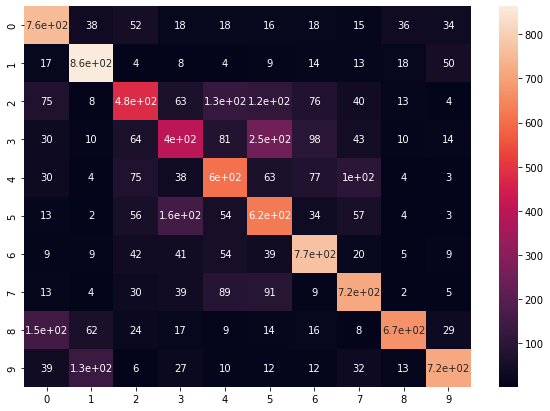

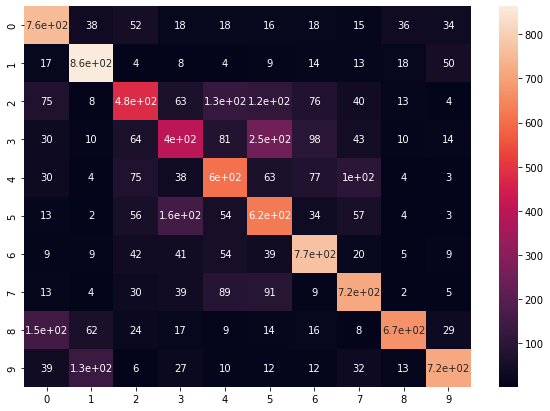

              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1000
           1       0.76      0.86      0.81      1000
           2       0.58      0.48      0.52      1000
           3       0.50      0.40      0.44      1000
           4       0.58      0.60      0.59      1000
           5       0.51      0.62      0.56      1000
           6       0.69      0.77      0.73      1000
           7       0.69      0.72      0.70      1000
           8       0.86      0.67      0.75      1000
           9       0.83      0.71      0.77      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000

Accuracy: 0.6601
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1000
           1       0.76      0.86      0.81      1000
           2       0.58      0.48      0.52      1000
       

In [27]:
# evaluate with the initial test dataset
evaluate(model, x_test, y_test, display=True)

In [28]:
# record the loss and accuracy
evalHistory.append(evaluate(model, x_test, y_test, display=False))
print(evalHistory[-1])

[1.0265716314315796, 0.660099983215332]
[1.0265716314315796, 0.660099983215332]


In [29]:
for i in range(30):
    #proba = model.predict_proba(remainXTrain, verbose=0)
    proba=model.predict(remainXTrain,verbose=0)
    # get new training data from high probability
    remainXTrain, remainYTrain, x_train2, y_train2, yEval= concatData(proba, 
                                                                      remainXTrain, 
                                                                      remainYTrain, 
                                                                      x_train2, 
                                                                      y_train2, 
                                                                      0.01,
                                                                      0.9999)
    errPred2 = getError(yEval)
    errPred = [errPred2[i]+errPred[i] for i in range(len(errPred))]
    model = trainModel(model, x_train2, y_train2, x_test, y_test)
    model = getNewestModel()
    evalHistory.append(evaluate(model, x_test, y_test, display=False))
    print("\nAfter Iter: {0}\n\tLoss and Acc: {1}\n".format(i,evalHistory[-1]))

number of data with first and second choice probability lower than 0.01: 542
number of data with first and second choice probability lower than 0.01: 542
number of data with probability higher than 0.9999: 426
x shape to be added from low margin: (542, 32, 32, 3)
y shape to be added: (542, 10)
x shape to be added from high probability: (426, 32, 32, 3)
y shape to be added: (426, 10)
new training data:
	x: (12060, 32, 32, 3)
	y: (12060, 10)
remaining data:
	x: (37940, 32, 32, 3)
	y: (37940, 10)
number of data with probability higher than 0.9999: 426
x shape to be added from low margin: (542, 32, 32, 3)
y shape to be added: (542, 10)
x shape to be added from high probability: (426, 32, 32, 3)
y shape to be added: (426, 10)
new training data:
	x: (12060, 32, 32, 3)
	y: (12060, 10)
remaining data:
	x: (37940, 32, 32, 3)
	y: (37940, 10)

Epoch 1: val_loss improved from inf to 1.02481, saving model to ./cifar10/combTest30\Cifar10_.01-0.63-1.02.hdf5

Epoch 1: val_loss improved from inf to 1.0


Epoch 1: val_loss improved from inf to 1.06074, saving model to ./cifar10/combTest30\Cifar10_.01-0.37-1.06.hdf5

Epoch 2: val_loss improved from 1.06074 to 1.05700, saving model to ./cifar10/combTest30\Cifar10_.02-0.32-1.06.hdf5

Epoch 2: val_loss improved from 1.06074 to 1.05700, saving model to ./cifar10/combTest30\Cifar10_.02-0.32-1.06.hdf5

Epoch 3: val_loss did not improve from 1.05700
Epoch 3: early stopping

Epoch 3: val_loss did not improve from 1.05700
Epoch 3: early stopping

After Iter: 5
	Loss and Acc: [1.057003140449524, 0.6926000118255615]


After Iter: 5
	Loss and Acc: [1.057003140449524, 0.6926000118255615]

number of data with first and second choice probability lower than 0.01: 269
number of data with first and second choice probability lower than 0.01: 269
number of data with probability higher than 0.9999: 644
x shape to be added from low margin: (269, 32, 32, 3)
y shape to be added: (269, 10)
x shape to be added from high probability: (644, 32, 32, 3)
y shape to b


Epoch 1: val_loss improved from inf to 1.07295, saving model to ./cifar10/combTest30\Cifar10_.01-0.30-1.07.hdf5

Epoch 1: val_loss improved from inf to 1.07295, saving model to ./cifar10/combTest30\Cifar10_.01-0.30-1.07.hdf5

Epoch 2: val_loss did not improve from 1.07295
Epoch 2: early stopping

Epoch 2: val_loss did not improve from 1.07295
Epoch 2: early stopping

After Iter: 11
	Loss and Acc: [1.0729485750198364, 0.7035999894142151]


After Iter: 11
	Loss and Acc: [1.0729485750198364, 0.7035999894142151]

number of data with first and second choice probability lower than 0.01: 190
number of data with first and second choice probability lower than 0.01: 190
number of data with probability higher than 0.9999: 726
x shape to be added from low margin: (190, 32, 32, 3)
y shape to be added: (190, 10)
x shape to be added from high probability: (726, 32, 32, 3)
y shape to be added: (726, 10)
new training data:
	x: (23003, 32, 32, 3)
	y: (23003, 10)
number of data with probability higher t

number of data with probability higher than 0.9999: 710
x shape to be added from low margin: (152, 32, 32, 3)
y shape to be added: (152, 10)
x shape to be added from high probability: (710, 32, 32, 3)
y shape to be added: (710, 10)
new training data:
	x: (26692, 32, 32, 3)
	y: (26692, 10)
remaining data:
	x: (23308, 32, 32, 3)
	y: (23308, 10)

Epoch 1: val_loss improved from inf to 1.17442, saving model to ./cifar10/combTest30\Cifar10_.01-0.22-1.17.hdf5

Epoch 1: val_loss improved from inf to 1.17442, saving model to ./cifar10/combTest30\Cifar10_.01-0.22-1.17.hdf5

Epoch 2: val_loss improved from 1.17442 to 1.10725, saving model to ./cifar10/combTest30\Cifar10_.02-0.21-1.11.hdf5

Epoch 2: val_loss improved from 1.17442 to 1.10725, saving model to ./cifar10/combTest30\Cifar10_.02-0.21-1.11.hdf5

Epoch 3: val_loss did not improve from 1.10725
Epoch 3: early stopping

Epoch 3: val_loss did not improve from 1.10725
Epoch 3: early stopping

After Iter: 17
	Loss and Acc: [1.107252597808838, 


Epoch 2: val_loss did not improve from 1.14408
Epoch 2: early stopping

Epoch 2: val_loss did not improve from 1.14408
Epoch 2: early stopping

After Iter: 22
	Loss and Acc: [1.1440763473510742, 0.7279999852180481]


After Iter: 22
	Loss and Acc: [1.1440763473510742, 0.7279999852180481]

number of data with first and second choice probability lower than 0.01: 132
number of data with first and second choice probability lower than 0.01: 132
number of data with probability higher than 0.9999: 456
x shape to be added from low margin: (132, 32, 32, 3)
y shape to be added: (132, 10)
x shape to be added from high probability: (456, 32, 32, 3)
y shape to be added: (456, 10)
new training data:
	x: (30183, 32, 32, 3)
	y: (30183, 10)
remaining data:
	x: (19817, 32, 32, 3)
	y: (19817, 10)
number of data with probability higher than 0.9999: 456
x shape to be added from low margin: (132, 32, 32, 3)
y shape to be added: (132, 10)
x shape to be added from high probability: (456, 32, 32, 3)
y shape to


Epoch 1: val_loss improved from inf to 1.16138, saving model to ./cifar10/combTest30\Cifar10_.01-0.23-1.16.hdf5

Epoch 2: val_loss did not improve from 1.16138
Epoch 2: early stopping

Epoch 2: val_loss did not improve from 1.16138
Epoch 2: early stopping

After Iter: 28
	Loss and Acc: [1.161382794380188, 0.7346000075340271]


After Iter: 28
	Loss and Acc: [1.161382794380188, 0.7346000075340271]

number of data with first and second choice probability lower than 0.01: 97
number of data with first and second choice probability lower than 0.01: 97
number of data with probability higher than 0.9999: 413
x shape to be added from low margin: (97, 32, 32, 3)
y shape to be added: (97, 10)
x shape to be added from high probability: (413, 32, 32, 3)
y shape to be added: (413, 10)
new training data:
	x: (33324, 32, 32, 3)
	y: (33324, 10)
remaining data:
	x: (16676, 32, 32, 3)
	y: (16676, 10)
number of data with probability higher than 0.9999: 413
x shape to be added from low margin: (97, 32, 32